<img src="kit_logo.jpg" width="200" height="200" align="right"/>

##### Lehrstuhl für Analytics and Statistics (IOR)
##### Prof. Dr. Oliver Grothe
##### SS 2020

# Multivariate Verfahren
## Übung 6

### Aufgabe 5

Betrachten Sie den Datensatz *`pisa.csv`* aus Ilias. Dieser enthält die Werte für
,,Lesekompetenz”, ,,Mathematische Grundbildung” und ,,Naturwissenschaftliche Grundbildung”
der Teilnehmerstaaten der PISA-Studie. 

Führen Sie eine Hauptkomponentenanalyse durch :

 a. Soll eine Hauptkomponentenanalyse eher mit der empirischen Kovarianzmatrix oder
mit der empirischen Korrelationsmatrix durchgeführt werden?

 b. Finden Sie die Hauptkomponenten des Modells und interpretieren Sie sie soweit möglich.

 c. Wie viele Komponenten benötigen Sie?

#### Datenvorbereitung

- Daten einlesen:

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("./pisa.csv",sep=',',header=None)
df = pd.DataFrame.to_numpy(df)
df[:10]

array([[528, 533, 528],
       [507, 520, 496],
       [396, 334, 375],
       [497, 514, 481],
       [484, 490, 487],
       [546, 536, 538],
       [505, 517, 500],
       [474, 447, 461],
       [523, 529, 532],
       [527, 503, 513]], dtype=int64)

-  Plot der orginale Daten

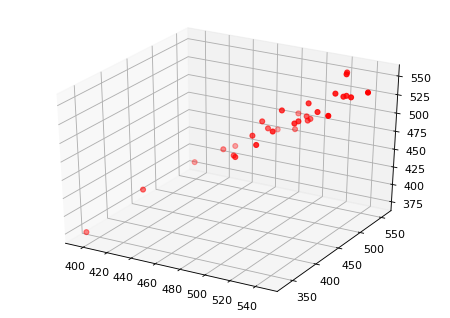

In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

x1 = df[:,0]
x2 = df[:,1]
x3 = df[:,2]
ax.scatter3D(x1, x2, x3,c='r')
ax.view_init(None, 300)
plt.show()

- Berechnung der empirischen Kovarianzmatrix

In [4]:
covar=np.cov(np.transpose(df))
covar

array([[1109.38924731, 1428.32473118, 1195.61397849],
       [1428.32473118, 2192.87311828, 1644.0311828 ],
       [1195.61397849, 1644.0311828 , 1418.97849462]])

In [5]:
from numpy import linalg as LA
w, v = LA.eig(covar)

print('Eigenvalues of covariance matrix: ', w)
print('Normalized eigenvectors of covariance matrix: ','\n',v)
# sanity check sum of eigenvalues
print('Sum of eigenvalues: ',np.sum(w))
print('Trace of covariance matrix: ',np.trace(covar))

Eigenvalues of covariance matrix:  [4513.53368412   57.6733079   150.0338682 ]
Normalized eigenvectors of covariance matrix:  
 [[-0.47993961 -0.70374348  0.52383499]
 [-0.68430926 -0.07333956 -0.72549442]
 [-0.54897979  0.70665864  0.44637961]]
Sum of eigenvalues:  4721.240860215047
Trace of covariance matrix:  4721.2408602150535


- Berechnung der empirischen Korrelationsmatrix

In [6]:
# correlation coefficient matrix
cor = np.corrcoef(df.T)
cor

array([[1.        , 0.91575274, 0.95293022],
       [0.91575274, 1.        , 0.93199888],
       [0.95293022, 0.93199888, 1.        ]])

In [7]:
eig_vals, eig_vecs = np.linalg.eig(cor)

print('Eigenvalues of correlation coefficient matrix: ', eig_vals)
print('Normalized eigenvectors of correlation coefficient matrix: ','\n',eig_vecs)
# sanity check sum of eigenvalues
print('Sum of eigenvalues: ',np.sum(eig_vals))
print('Trace of correlation coefficient matrix: ',np.trace(cor))

Eigenvalues of correlation coefficient matrix:  [2.86720406 0.04488602 0.08790992]
Normalized eigenvectors of correlation coefficient matrix:  
 [[-0.5776974  -0.59936162  0.55410411]
 [-0.57332755 -0.18524162 -0.79811094]
 [-0.58100021  0.77874976  0.23661692]]
Sum of eigenvalues:  2.9999999999999996
Trace of correlation coefficient matrix:  3.0


#### Hauptkomponentenanalyse

- Berechnung der zentrierten Daten

In [8]:
import numpy.matlib
df_mean=np.matlib.repmat(np.mean(df,axis=0),31,1)
df2=df-df_mean # centered data
df2[:10]

array([[  34.5483871 ,   39.83870968,   35.38709677],
       [  13.5483871 ,   26.83870968,    3.38709677],
       [ -97.4516129 , -159.16129032, -117.61290323],
       [   3.5483871 ,   20.83870968,  -11.61290323],
       [  -9.4516129 ,   -3.16129032,   -5.61290323],
       [  52.5483871 ,   42.83870968,   45.38709677],
       [  11.5483871 ,   23.83870968,    7.38709677],
       [ -19.4516129 ,  -46.16129032,  -31.61290323],
       [  29.5483871 ,   35.83870968,   39.38709677],
       [  33.5483871 ,    9.83870968,   20.38709677]])

- Model festlegen und anpassen

In [9]:
# pca
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
coeff = pca.components_.T
score = pca.fit_transform(df)
latent = pca.explained_variance_
print('coeff: ',coeff)
print('score: ',score)
print('latent: ', latent)

coeff:  [[-0.47993961 -0.52383499 -0.70374348]
 [-0.68430926  0.72549442 -0.07333956]
 [-0.54897979 -0.44637961  0.70665864]]
score:  [[-6.32699383e+01 -4.99097102e+00 -2.22835806e+00]
 [-2.67278328e+01  1.08622839e+01 -9.10940710e+00]
 [ 2.20253541e+02 -1.19220609e+01 -2.85841741e+00]
 [-9.58788427e+00  1.84433615e+01 -1.22318145e+01]
 [ 9.78087408e+00  5.16307260e+00  2.91695203e+00]
 [-7.94515769e+01 -1.67073136e+01 -8.04917296e+00]
 [-2.59109450e+01  7.94795217e+00 -4.65526691e+00]
 [ 5.82790428e+01 -9.18896748e+00 -5.26513651e+00]
 [-6.03289223e+01 -7.05929222e+00  4.41035212e+00]
 [-3.40260240e+01 -1.95362743e+01 -9.92430722e+00]
 [-2.26219772e+01  6.50931741e+00 -8.66936972e+00]
 [ 3.58640789e+01 -1.63323316e+01 -3.13400052e+00]
 [-8.88912782e+01  5.74355337e+00  1.57804433e+01]
 [-6.66985557e+01 -8.58036055e+00 -5.74416028e+00]
 [-8.45859640e+01 -3.97565498e+00  1.58159257e+01]
 [ 5.55581082e+01  1.12466826e+01  4.11466745e+00]
 [-1.23830789e-01  2.80089493e+01 -5.91269901e+00]

- Plot der neue Koordinaten in gleichem euklidischem Raum

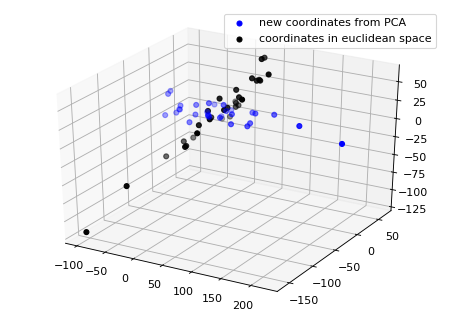

In [10]:
fig = plt.figure(figsize=(7,5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
x1 = score[:,0]
x2 = score[:,1]
x3 = score[:,2]
ax.scatter3D(x1, x2, x3,c='b',label='new coordinates from PCA')
y1 = df2[:,0]
y2 = df2[:,1]
y3 = df2[:,2]
ax.scatter3D(y1, y2, y3,c='k',label='coordinates in euclidean space')
ax.view_init(None, 300)
ax.legend(loc='upper right')
plt.show()

- manuelle Berechnung der neue Koordinaten (Scores)

In [11]:
score_manual=np.matmul(df2,coeff)
score_manual

array([[-6.32699383e+01, -4.99097102e+00, -2.22835806e+00],
       [-2.67278328e+01,  1.08622839e+01, -9.10940710e+00],
       [ 2.20253541e+02, -1.19220609e+01, -2.85841741e+00],
       [-9.58788427e+00,  1.84433615e+01, -1.22318145e+01],
       [ 9.78087408e+00,  5.16307260e+00,  2.91695203e+00],
       [-7.94515769e+01, -1.67073136e+01, -8.04917296e+00],
       [-2.59109450e+01,  7.94795217e+00, -4.65526691e+00],
       [ 5.82790428e+01, -9.18896748e+00, -5.26513651e+00],
       [-6.03289223e+01, -7.05929222e+00,  4.41035212e+00],
       [-3.40260240e+01, -1.95362743e+01, -9.92430722e+00],
       [-2.26219772e+01,  6.50931741e+00, -8.66936972e+00],
       [ 3.58640789e+01, -1.63323316e+01, -3.13400052e+00],
       [-8.88912782e+01,  5.74355337e+00,  1.57804433e+01],
       [-6.66985557e+01, -8.58036055e+00, -5.74416028e+00],
       [-8.45859640e+01, -3.97565498e+00,  1.58159257e+01],
       [ 5.55581082e+01,  1.12466826e+01,  4.11466745e+00],
       [-1.23830789e-01,  2.80089493e+01

# Exkurs

- Plot der Eigenvektoren (Loadings) 

In [12]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

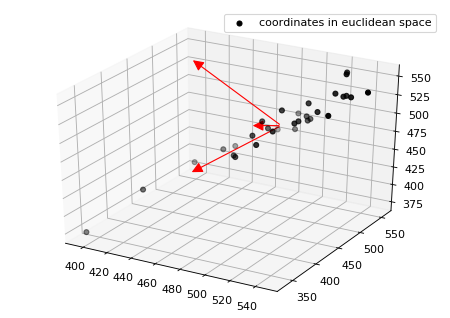

In [13]:
fig = plt.figure(figsize=(7,5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

y1 = df[:,0]
y2 = df[:,1]
y3 = df[:,2]
ax.scatter3D(y1, y2, y3,c='k',label='coordinates in euclidean space')
for v in coeff.T:
    a = Arrow3D([np.mean(df,axis=0)[0], np.mean(df,axis=0)[0]+100*v[0]], [np.mean(df,axis=0)[1], np.mean(df,axis=0)[1]+100*v[1]], 
                [np.mean(df,axis=0)[2], np.mean(df,axis=0)[2]+100*v[2]], mutation_scale=20, 
                lw=1, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.view_init(None, 300)
ax.legend(loc='upper right')
plt.draw()
plt.show()

-  Rekonstruierte Daten aus 2 Hauptkomponenten

In [14]:
#reconstruct data with the frist 2 components
x_2=np.matmul(score[:,:2],coeff[:,:2].T)

- Berechnung des Anteils der erklärten Varianz an der Gesamtvarianz 

In [15]:
explained_variances=latent[:2].sum()

In [16]:
explained_variances_share=explained_variances/latent.sum()
print('explained variances of the frist 2 components: ',explained_variances_share)

explained variances of the frist 2 components:  0.9877842902739055


In [17]:
#check if the reconstruceted data with all components and orignal data are the same 
x_rep=np.matmul(score,coeff.T)
(np.abs(df2-x_rep)<0.0001).all()

True

- Plot der rekonstruierten Daten (2-dim) und Vergleich mit dem originalen Daten

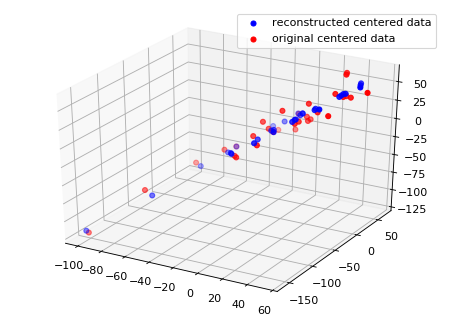

In [18]:
fig = plt.figure(figsize=(7,5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

x1 = x_2[:,0]
x2 = x_2[:,1]
x3 = x_2[:,2]
ax.scatter3D(x1, x2, x3,c='b',label='reconstructed centered data')

y1 = df2[:,0]
y2 = df2[:,1]
y3 = df2[:,2]
ax.scatter3D(y1, y2, y3,c='r',label='original centered data')
ax.view_init(None, 300)
ax.legend(loc='upper right')
plt.show()